# Installing and importing libraries

In [ ]:
!pip install tensorflow-privacy
!pip install --upgrade tensorflow-estimator==2.3.0
!pip install --upgrade tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.4 MB/s eta 0:00:00
  Attempting uninstall: dm-tree
    Found existing installation: dm-tree 0.1.9
    Uninstalling dm-tree-0.1.9:
      Successfully uninstalled dm-tree-0.1.9
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found exis

In [ ]:
#import pandas as pd
import csv
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
#import tensorflow_privacy as tfp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

RecursionError: maximum recursion depth exceeded

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# File conversions and defining paths

In [ ]:
# Define input and output file paths for all files
files = [
    {
        'txt_file': '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.txt',
        'csv_file': '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.csv'
    },
    {
        'txt_file': '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsDiagnosesCorePopulatedTable.txt',
        'csv_file': '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsDiagnosesCorePopulatedTable.csv'
    },
    {
        'txt_file': '/content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.txt',
        'csv_file': '/content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.csv'
    },
    {
        'txt_file': '/content/drive/MyDrive/datasets/100000-Patients/PatientCorePopulatedTable.txt',
        'csv_file': '/content/drive/MyDrive/datasets/100000-Patients/PatientCorePopulatedTable.csv'
    }
]

In [ ]:
# Define the file paths
admissions_file = '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.csv'
diagnoses_file = '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsDiagnosesCorePopulatedTable.csv'
patients_file = '/content/drive/MyDrive/datasets/100000-Patients/PatientCorePopulatedTable.csv'
labs_file = '/content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.csv'

In [ ]:
# Process each file
for file in files:
    txt_file = file['txt_file']
    csv_file = file['csv_file']

    # Read the .txt file and write to a .csv file
    with open(txt_file, 'r') as infile, open(csv_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)
        for line in infile:
            # Assuming tab or comma separates values in the .txt file
            row = line.strip().split('\t')  # Replace '\t' with ',' if comma-separated
            writer.writerow(row)

    print(f"File converted and saved as {csv_file}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.txt'

# Basic Analysis

In [ ]:
# Process each file
for file in files:
    csv_file = file['csv_file']

    # If the file is too large, use nrows=0 to load only the header
    try:
        # Load only the column names (header) for large files
        data = pd.read_csv(csv_file, nrows=0)

        # Display the column names
        print(f"Column names of {csv_file}:")
        print(data.columns.tolist())  # Convert the column names to a list for better readability
        print("\n" + "-"*50 + "\n")
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")

Column names of /content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.csv:
['PatientID', 'AdmissionID', 'AdmissionStartDate', 'AdmissionEndDate']

--------------------------------------------------

Column names of /content/drive/MyDrive/datasets/100000-Patients/AdmissionsDiagnosesCorePopulatedTable.csv:
['PatientID', 'AdmissionID', 'PrimaryDiagnosisCode', 'PrimaryDiagnosisDescription']

--------------------------------------------------

Column names of /content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.csv:
['PatientID', 'AdmissionID', 'LabName', 'LabValue', 'LabUnits', 'LabDateTime']

--------------------------------------------------

Column names of /content/drive/MyDrive/datasets/100000-Patients/PatientCorePopulatedTable.csv:
['PatientID', 'PatientGender', 'PatientDateOfBirth', 'PatientRace', 'PatientMaritalStatus', 'PatientLanguage', 'PatientPopulationPercentageBelowPoverty']

--------------------------------------------------



In [ ]:
# Load the patient IDs from each file
admissions_data = pd.read_csv(admissions_file)
diagnoses_data = pd.read_csv(diagnoses_file)
patients_data = pd.read_csv(patients_file)

# Extract the unique patient IDs from each dataset
admissions_patients = admissions_data['PatientID'].unique()
diagnoses_patients = diagnoses_data['PatientID'].unique()
patients_patients = patients_data['PatientID'].unique()

# Check if all patients in one file are present in the other two files
all_in_diagnoses = all(patient in diagnoses_patients for patient in admissions_patients)
all_in_patients = all(patient in patients_patients for patient in admissions_patients)

# Print results
if all_in_diagnoses and all_in_patients:
    print("All patients from AdmissionsCorePopulatedTable are present in both AdmissionsDiagnosesCorePopulatedTable and PatientCorePopulatedTable.")
else:
    if not all_in_diagnoses:
        print("Some patients from AdmissionsCorePopulatedTable are missing in AdmissionsDiagnosesCorePopulatedTable.")
    if not all_in_patients:
        print("Some patients from AdmissionsCorePopulatedTable are missing in PatientCorePopulatedTable.")

All patients from AdmissionsCorePopulatedTable are present in both AdmissionsDiagnosesCorePopulatedTable and PatientCorePopulatedTable.


In [ ]:
# Load the datasets
admissions_data = pd.read_csv(admissions_file)
diagnoses_data = pd.read_csv(diagnoses_file)
patients_data = pd.read_csv(patients_file)

# Calculate the unique and total PatientID counts for each file
def print_patient_counts(data, file_name):
    unique_patient_count = data['PatientID'].nunique()
    total_patient_count = len(data['PatientID'])
    print(f"{file_name}:")
    print(f"  Unique PatientID count: {unique_patient_count}")
    print(f"  Total PatientID count: {total_patient_count}\n")

# Print the counts for each dataset
print_patient_counts(admissions_data, "AdmissionsCorePopulatedTable.csv")
print_patient_counts(diagnoses_data, "AdmissionsDiagnosesCorePopulatedTable.csv")
print_patient_counts(patients_data, "PatientCorePopulatedTable.csv")

AdmissionsCorePopulatedTable.csv:
  Unique PatientID count: 100000
  Total PatientID count: 361760

AdmissionsDiagnosesCorePopulatedTable.csv:
  Unique PatientID count: 100000
  Total PatientID count: 361760

PatientCorePopulatedTable.csv:
  Unique PatientID count: 100000
  Total PatientID count: 100000



In [ ]:
# Calculate the unique and total AdmissionStartDate counts for AdmissionsCorePopulatedTable file
admissions_data = pd.read_csv(admissions_file)
def print_patient_counts(data, file_name):
    unique_AdmissionStartDate = data['AdmissionStartDate'].nunique()
    total_AdmissionStartDate = len(data['AdmissionStartDate'])
    print(f"{file_name}:")
    print(f"  Unique AdmissionStartDate count: {unique_AdmissionStartDate}")
    print(f"  Total AdmissionStartDate count: {total_AdmissionStartDate}\n")

print_patient_counts(admissions_data, "AdmissionsCorePopulatedTable.csv")

NameError: name 'pd' is not defined

In [ ]:
# Initialize counters for unique and total PatientID
unique_patient_ids = set()
total_patient_count = 0

# Define the chunk size
chunk_size = 50000

# Process the file in chunks
for chunk in pd.read_csv(labs_file, chunksize=chunk_size):
    # Extract the PatientID column
    patient_ids = chunk['PatientID']

    # Update the set of unique patient IDs
    unique_patient_ids.update(patient_ids)

    # Update the total patient count
    total_patient_count += len(patient_ids)

# Print the results
print(f"LabsCorePopulatedTable.csv:")
print(f"  Unique PatientID count: {len(unique_patient_ids)}")
print(f"  Total PatientID count: {total_patient_count}")

NameError: name 'pd' is not defined

In [ ]:
# Read the first 10 rows of the labs file
labs_data = pd.read_csv(labs_file, nrows=10)

# Print the first 10 rows
print(labs_data)

                              PatientID  AdmissionID  \
0  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
1  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
2  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
3  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
4  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
5  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
6  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
7  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
8  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   
9  BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3            1   

                        LabName  LabValue LabUnits  \
0           METABOLIC: ALT/SGPT      40.0      U/L   
1                CBC: MONOCYTES       0.9   k/cumm   
2            METABOLIC: GLUCOSE     134.2    mg/dL   
3                      CBC: RDW      15.0        %   
4            METABOLIC: ALBUMIN       2.8    gm/dL   
5   URINALYSIS: RED BLOOD CELLS       0.5  rbc/hpf   
6   C

In [ ]:
# Define the file paths
file_paths = [
    admissions_file,
    diagnoses_file,
    patients_file,
]

# Function to check for missing values and duplicates
def check_file_integrity(file_path):
    try:
        missing_found = False
        duplicate_found = False

        # Use sets for duplicates in case the file is large
        unique_rows_set = set() if file_path == labs_file else None

        # Load data in chunks for large files
        for chunk in pd.read_csv(file_path, chunksize=50000):  # Adjust chunksize for large files
            # Check for missing values
            if chunk.isnull().any().any():
                missing_found = True

            # Check for duplicates
            if unique_rows_set is not None:
                # Convert rows to tuples for set comparison
                rows_as_tuples = map(tuple, chunk.to_numpy())
                for row in rows_as_tuples:
                    if row in unique_rows_set:
                        duplicate_found = True
                        break
                    unique_rows_set.add(row)
            else:
                # For smaller files, use pandas' duplicate detection
                if chunk.duplicated().any():
                    duplicate_found = True

            # Stop early if duplicates or missing values are found
            if missing_found or duplicate_found:
                break

        # Print results
        print(f"{file_path}:")
        print(f"  Contains missing values: {'Yes' if missing_found else 'No'}")
        print(f"  Contains duplicate rows: {'Yes' if duplicate_found else 'No'}\n")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Check each file for missing values and duplicates
for file_path in file_paths:
    check_file_integrity(file_path)


/content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.csv:
  Contains missing values: No
  Contains duplicate rows: No

/content/drive/MyDrive/datasets/100000-Patients/AdmissionsDiagnosesCorePopulatedTable.csv:
  Contains missing values: No
  Contains duplicate rows: No

/content/drive/MyDrive/datasets/100000-Patients/PatientCorePopulatedTable.csv:
  Contains missing values: No
  Contains duplicate rows: No



In [ ]:
# Load your data
admissions_df = pd.read_csv("/content/drive/MyDrive/datasets/100000-Patients/AdmissionsCorePopulatedTable.csv")
diagnoses_df = pd.read_csv("/content/drive/MyDrive/datasets/100000-Patients/AdmissionsDiagnosesCorePopulatedTable.csv")
patient_df = pd.read_csv("/content/drive/MyDrive/datasets/100000-Patients/PatientCorePopulatedTable.csv")

# Show first few rows of each dataset
print(admissions_df.head(10))
print(diagnoses_df.head(10))
print(patient_df.head(10))

                              PatientID  AdmissionID       AdmissionStartDate  \
0  9380F9E3-1927-42F3-9731-03A74D4E4C6B            5  2011-03-23 00:14:52.237   
1  0A89658C-C739-45CA-9BF1-CBDDDFB922C0            1  1974-02-10 00:04:28.357   
2  0A89658C-C739-45CA-9BF1-CBDDDFB922C0            2  1991-05-22 15:08:52.743   
3  0A89658C-C739-45CA-9BF1-CBDDDFB922C0            3  1995-02-26 08:01:26.477   
4  0A89658C-C739-45CA-9BF1-CBDDDFB922C0            4  2005-03-17 04:51:15.747   
5  0A89658C-C739-45CA-9BF1-CBDDDFB922C0            5  2008-04-12 23:17:33.217   
6  EB1C36B1-0697-4145-95EE-0B0C44943339            1  1995-12-04 16:01:07.700   
7  EB1C36B1-0697-4145-95EE-0B0C44943339            2  2001-08-02 05:05:13.547   
8  EB1C36B1-0697-4145-95EE-0B0C44943339            3  2009-11-15 09:31:16.750   
9  F5F37898-D271-4D68-9C0E-18B1184411C6            1  1989-03-15 16:32:19.170   

          AdmissionEndDate  
0  2011-03-28 01:57:56.467  
1  1974-02-16 21:04:43.333  
2  1991-05-29 12:30:0

In [ ]:
print(patient_df['PatientGender'].unique())

['Female' 'Male']


# Combining patient data with admissions data

In [ ]:
# Merge all data on PatientID and AdmissionID
merged_df = admissions_df.merge(patient_df, on=['PatientID'], how='left')

# Drop non-numeric columns (for simplicity, we can later handle categorical data separately)
numeric_df = merged_df.select_dtypes(include=[np.number])

# Handle missing values
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Conversion of lab txt to csv

In [ ]:
 txt_file = '/content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.txt'
 csv_file ='/content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.csv'

#Read the .txt file and write to a .csv file
with open(txt_file, 'r') as infile, open(csv_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    for line in infile:
        # Assuming tab or comma separates values in the .txt file
        row = line.strip().split('\t')  # Replace '\t' with ',' if comma-separated
        writer.writerow(row)

print(f"File converted and saved as {csv_file}")


File converted and saved as /content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.csv


# Creating a lab file with filtered columns

In [ ]:
# Define the file paths
input_file = '/content/drive/MyDrive/datasets/100000-Patients/LabsCorePopulatedTable.csv'  # Your huge original file
output_file = '/content/drive/MyDrive/datasets/100000-Patients/labs_core_selected_columns.csv'  # New smaller file

# Define the columns you want to keep
selected_columns = ['PatientID', 'AdmissionID', 'LabName', 'LabValue']

# Set a batch size
chunk_size = 10000  # number of rows per batch

# Initialize writing: make sure first write includes the header
first_chunk = True

# Read and process in chunks
for chunk in pd.read_csv(input_file, usecols=selected_columns, chunksize=chunk_size):
    # Write the selected columns to the output file
    chunk.to_csv(output_file, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
    first_chunk = False  # Only write header for the first chunk

print(f"✅ New file created: {output_file}")

✅ New file created: /content/drive/MyDrive/datasets/100000-Patients/labs_core_selected_columns.csv


# Readmission feature generation

In [ ]:
# Make sure admission and discharge dates are datetime
merged_df['AdmissionStartDate'] = pd.to_datetime(merged_df['AdmissionStartDate'])
merged_df['AdmissionEndDate'] = pd.to_datetime(merged_df['AdmissionEndDate'])

# Sort by patient and admissionStartdate
merged_df = merged_df.sort_values(by=['PatientID', 'AdmissionStartDate'])

# Calculate days to next admission
merged_df['next_admission_date'] = merged_df.groupby('PatientID')['AdmissionStartDate'].shift(-1)
merged_df['days_to_readmission'] = (merged_df['next_admission_date'] - merged_df['AdmissionEndDate']).dt.days

# Define readmission: 1 if readmitted within 30 days, else 0
merged_df['readmission'] = merged_df['days_to_readmission'].apply(lambda x: 1 if 0 <= x <= 30 else 0)

# View
print(merged_df[['PatientID', 'AdmissionID', 'readmission']].head())

# Define the output file path in your Google Drive
output_file_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_admissions_patient_data.csv'

# Save the DataFrame to CSV
merged_df.to_csv(output_file_path, index=False)

print(f"✅ Merged DataFrame saved to: {output_file_path}")

                                   PatientID  AdmissionID  readmission
320049  0000585C-5C9D-49BD-8F9E-41345464F832            1            0
320050  0000585C-5C9D-49BD-8F9E-41345464F832            2            0
125111  00005E17-D776-4260-8566-3BF18422A777            1            0
125112  00005E17-D776-4260-8566-3BF18422A777            2            0
32930   00008B98-12EC-484A-A730-788707EB72C8            1            0
✅ Merged DataFrame saved to: /content/drive/MyDrive/datasets/100000-Patients/merged_admissions_patient_data.csv


# Combining patient data with lab data and pivotting columns

In [ ]:
# Paths to files
merged_df_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_admissions_patient_data.csv'
labs_core_df_path = '/content/drive/MyDrive/datasets/100000-Patients/labs_core_selected_columns.csv'
output_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_half_patients_newfile.csv'

# Load merged_df
merged_df = pd.read_csv(merged_df_path)
print("✅ Loaded merged_df with shape:", merged_df.shape)

# Select 50% of unique PatientIDs
unique_patient_ids = merged_df['PatientID'].unique()
np.random.seed(42)  # For reproducibility
selected_patient_ids = np.random.choice(unique_patient_ids, size=len(unique_patient_ids) // 2, replace=False)

# Filter merged_df to only include selected PatientIDs
filtered_merged_df = merged_df[merged_df['PatientID'].isin(selected_patient_ids)]
print("✅ Filtered merged_df to shape:", filtered_merged_df.shape)

# Load labs_core_selected_columns.csv
labs_core_df = pd.read_csv(labs_core_df_path, usecols=['PatientID', 'AdmissionID', 'LabName', 'LabValue'])
print("✅ Loaded labs_core_df with shape:", labs_core_df.shape)

# Filter labs_core_df to only include selected PatientIDs (no random sampling here)
labs_core_filtered = labs_core_df[labs_core_df['PatientID'].isin(selected_patient_ids)]
print("✅ Filtered labs_core_df to shape:", labs_core_filtered.shape)

# Merge the datasets
final_merged = pd.merge(
    filtered_merged_df,
    labs_core_filtered,
    on=['PatientID', 'AdmissionID'],
    how='left'
)

# Save the final merged dataset
final_merged.to_csv(output_path, index=False)
print(f"✅ Final merged data (50% patients, matching labs) saved to: {output_path}")

✅ Loaded merged_df with shape: (361760, 13)
✅ Filtered merged_df to shape: (181284, 13)
✅ Loaded labs_core_df with shape: (107535387, 4)
✅ Filtered labs_core_df to shape: (53882973, 4)
✅ Final merged data (50% patients, matching labs) saved to: /content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_half_patients_newfile.csv


In [ ]:
# Load your merged dataset
merged_final = pd.read_csv('/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_half_patients_newfile.csv')

# Drop the admission_start_date and admission_end_date columns
merged_final = merged_final.drop(['AdmissionStartDate', 'AdmissionEndDate'], axis=1)

# Save the cleaned dataset
merged_final.to_csv('merged_with_labs_cleaned.csv', index=False)

print("✅ Columns removed! New shape:", merged_final.shape)
print(merged_final.head())

✅ Columns removed! New shape: (53882973, 13)
                              PatientID  AdmissionID PatientGender  \
0  0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6            1          Male   
1  0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6            1          Male   
2  0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6            1          Male   
3  0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6            1          Male   
4  0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6            1          Male   

        PatientDateOfBirth PatientRace PatientMaritalStatus PatientLanguage  \
0  1987-02-07 02:56:53.157       Asian               Single         English   
1  1987-02-07 02:56:53.157       Asian               Single         English   
2  1987-02-07 02:56:53.157       Asian               Single         English   
3  1987-02-07 02:56:53.157       Asian               Single         English   
4  1987-02-07 02:56:53.157       Asian               Single         English   

   PatientPopulationPercentageBelowPoverty next_admission_d

In [ ]:
import pandas as pd

# Load your data
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_cleaned.csv'
df = pd.read_csv(data_path)

print("✅ Loaded data with shape:", df.shape)

# Separate lab tests and other columns
non_lab_columns = ['PatientID', 'AdmissionID', 'readmission', 'PatientGender','PatientDateOfBirth','PatientRace','PatientMaritalStatus','PatientLanguage','PatientPopulationPercentageBelowPoverty','next_admission_date','days_to_readmission']  # Add any other columns you want to keep

# Pivot the lab part
lab_pivot = df.pivot_table(
    index=['PatientID', 'AdmissionID'],
    columns='LabName',
    values='LabValue',
    aggfunc='mean'  # In case multiple lab values exist for same PatientID + AdmissionID + LabName
)

# Reset index to flatten
lab_pivot = lab_pivot.reset_index()

# Drop duplicate rows to keep only one row per PatientID + AdmissionID in original data
other_info = df[non_lab_columns].drop_duplicates(subset=['PatientID', 'AdmissionID'])

# Merge pivoted lab results back with other columns
pivot_df = pd.merge(other_info, lab_pivot, on=['PatientID', 'AdmissionID'], how='left')

# Preview
print("✅ Pivoted data shape:", pivot_df.shape)
print(pivot_df.head())

# Save the pivoted dataset
pivoted_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
pivot_df.to_csv(pivoted_path, index=False)
print(f"✅ Pivoted data saved to: {pivoted_path}")


✅ Loaded data with shape: (53882973, 13)
✅ Pivoted data shape: (181284, 46)
                              PatientID  AdmissionID  readmission  \
0  0001E6FA-A3D7-4569-A0B3-7E9865EFF6B6            1            0   
1  00034C68-CEC9-4D2A-8C82-76595C67FBF7            1            0   
2  00034C68-CEC9-4D2A-8C82-76595C67FBF7            2            0   
3  00034C68-CEC9-4D2A-8C82-76595C67FBF7            3            0   
4  00034C68-CEC9-4D2A-8C82-76595C67FBF7            4            0   

  PatientGender       PatientDateOfBirth PatientRace PatientMaritalStatus  \
0          Male  1987-02-07 02:56:53.157       Asian               Single   
1        Female  1942-01-30 06:27:26.147       White               Single   
2        Female  1942-01-30 06:27:26.147       White               Single   
3        Female  1942-01-30 06:27:26.147       White               Single   
4        Female  1942-01-30 06:27:26.147       White               Single   

  PatientLanguage  PatientPopulationPercentage

# Check for unbalanced data (not done)

In [ ]:
print(pivot_df.shape)

(181284, 37)


In [ ]:
# Count number of readmissions where readmission == 1
num_readmitted =(pivot_df['readmission'] == 1).sum()

print(f"✅ Number of patients with readmission = 1: {num_readmitted}")

✅ Number of patients with readmission = 1: 641


In [ ]:
# Count number of unique lab names
num_unique_labs = pivot_df['PatientID'].nunique()

print(f"✅ Number of unique Lab Names: {num_unique_labs}")

✅ Number of unique Lab Names: 50000


In [ ]:
# Correct filtering from pivot_df
readmitted_patients = pivot_df[pivot_df['readmission'] == 1]

# Count unique PatientIDs
unique_patient_count = readmitted_patients['PatientID'].nunique()

print(f"✅ Number of unique PatientIDs with readmission=1: {unique_patient_count}")

✅ Number of unique PatientIDs with readmission=1: 632


# Final Dataset

In [ ]:
# Load the pivoted dataset
pivoted_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
pivot_df = pd.read_csv(pivoted_path)

# Print column names and their types
print("✅ Data types of columns:")
print(pivot_df.dtypes)


✅ Data types of columns:
PatientID                                   object
AdmissionID                                  int64
readmission                                  int64
PatientGender                               object
PatientDateOfBirth                          object
PatientRace                                 object
PatientMaritalStatus                        object
PatientLanguage                             object
PatientPopulationPercentageBelowPoverty    float64
next_admission_date                         object
days_to_readmission                        float64
CBC: ABSOLUTE LYMPHOCYTES                  float64
CBC: ABSOLUTE NEUTROPHILS                  float64
CBC: BASOPHILS                             float64
CBC: EOSINOPHILS                           float64
CBC: HEMATOCRIT                            float64
CBC: HEMOGLOBIN                            float64
CBC: LYMPHOCYTES                           float64
CBC: MCH                                   float64
CBC: M

# Model training and testing

✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 128


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=128 → Accuracy=0.9965, ε=1.87


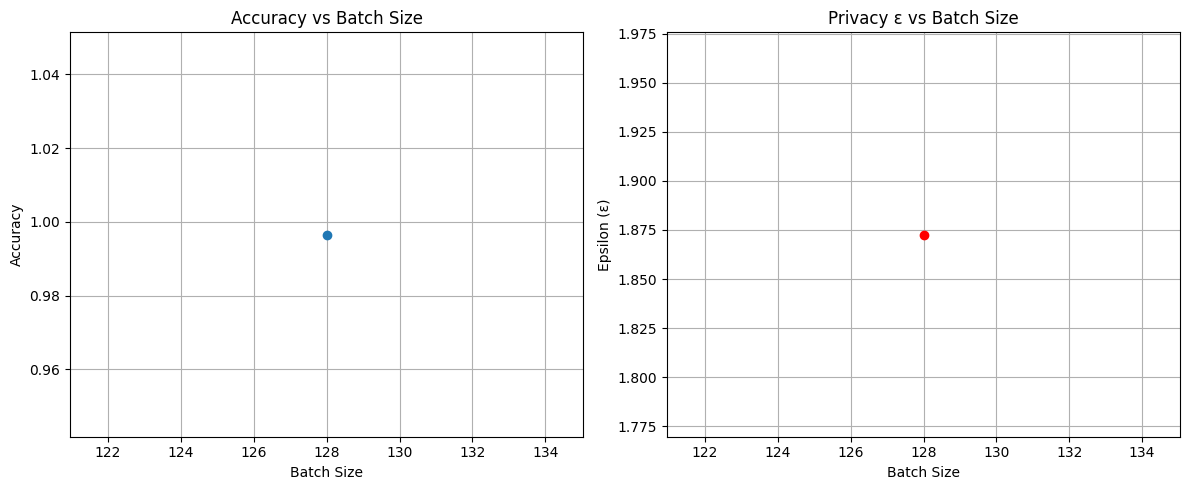

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 128
noise_multiplier = 0.7

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 256


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=256 → Accuracy=0.9965, ε=2.36


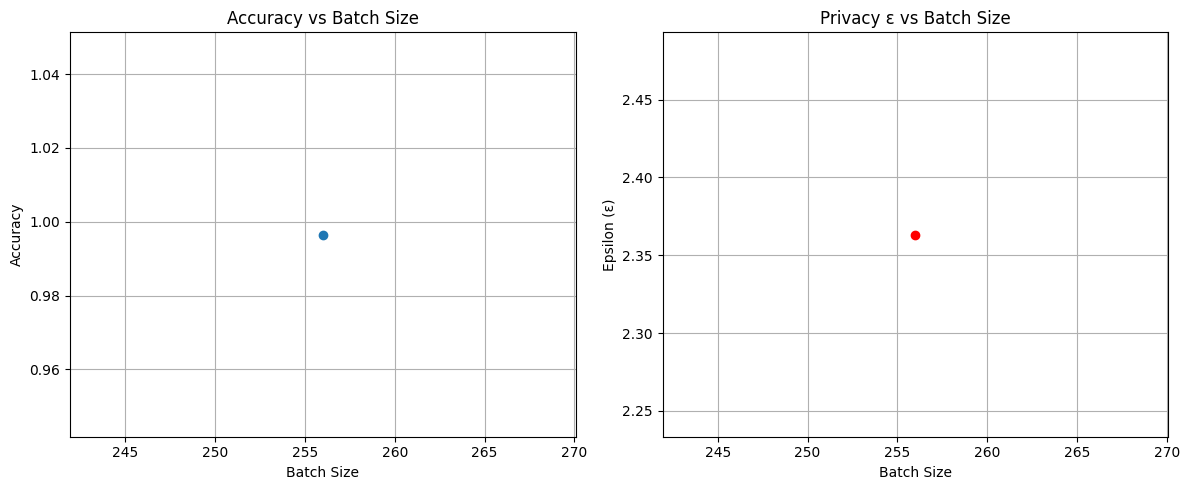

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 256
noise_multiplier = 0.7

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 512


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=512 → Accuracy=0.9966, ε=2.81


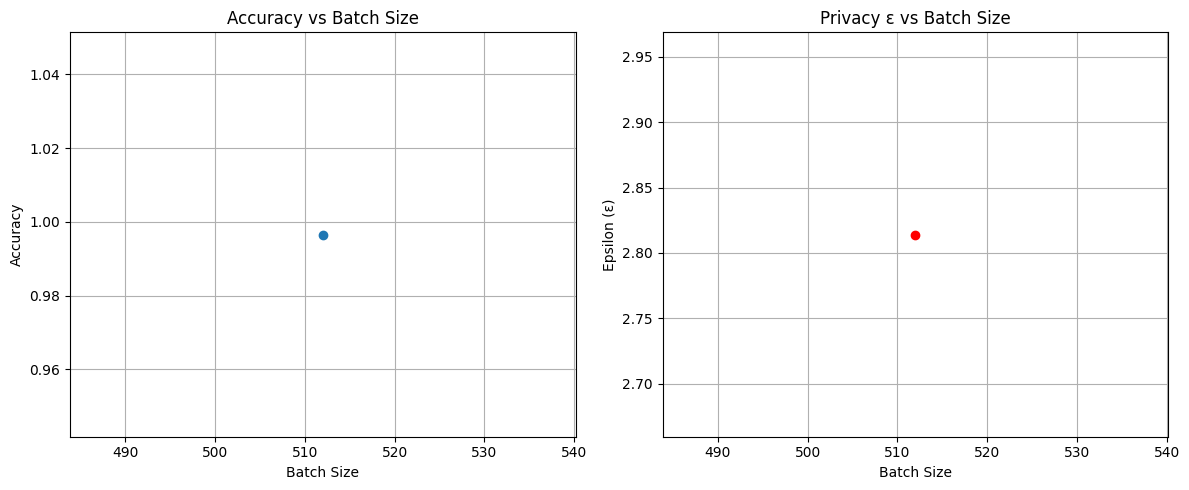

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 512
noise_multiplier = 0.7

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 128


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=128 → Accuracy=0.9965, ε=5.47


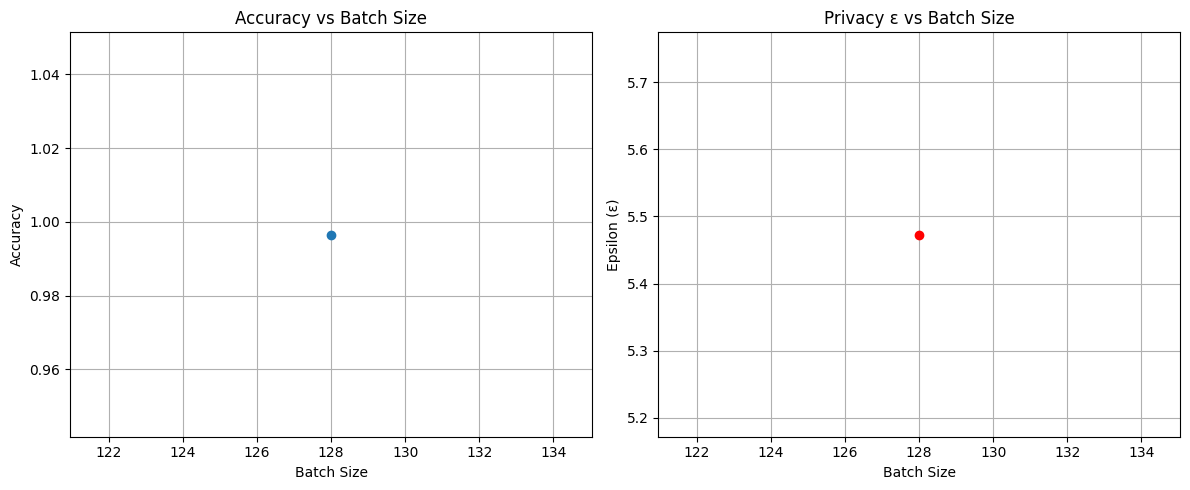

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 128
noise_multiplier = 0.5

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 256


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=256 → Accuracy=0.9965, ε=6.78


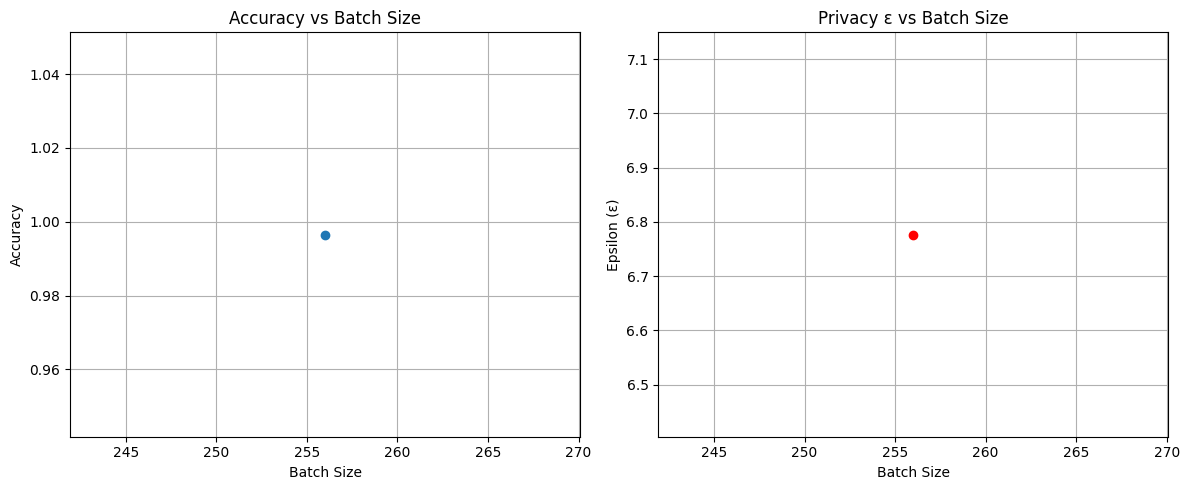

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 256
noise_multiplier = 0.5

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 512


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=512 → Accuracy=0.9966, ε=8.46


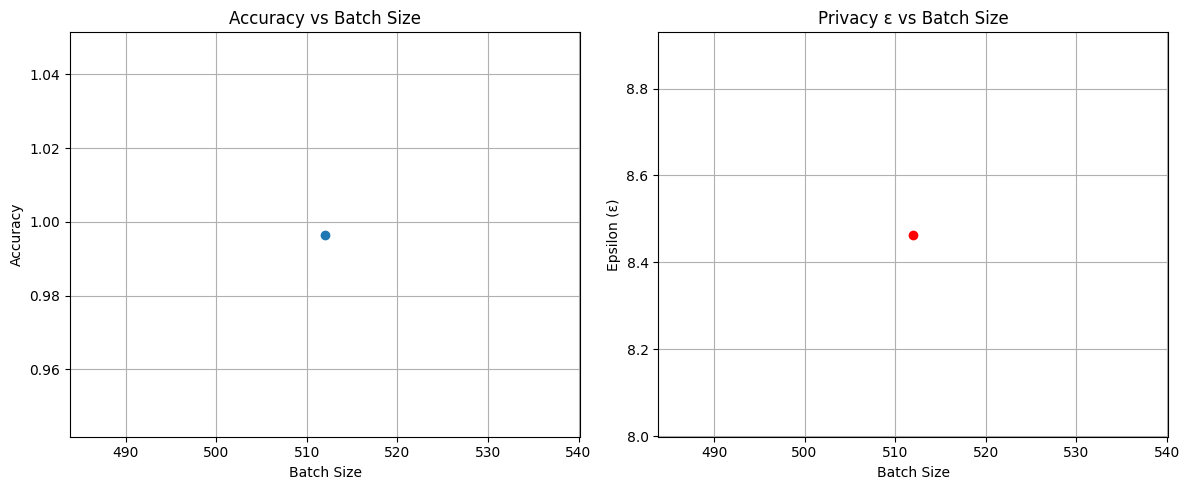

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 512
noise_multiplier = 0.5

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 128


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=128 → Accuracy=0.9965, ε=0.72


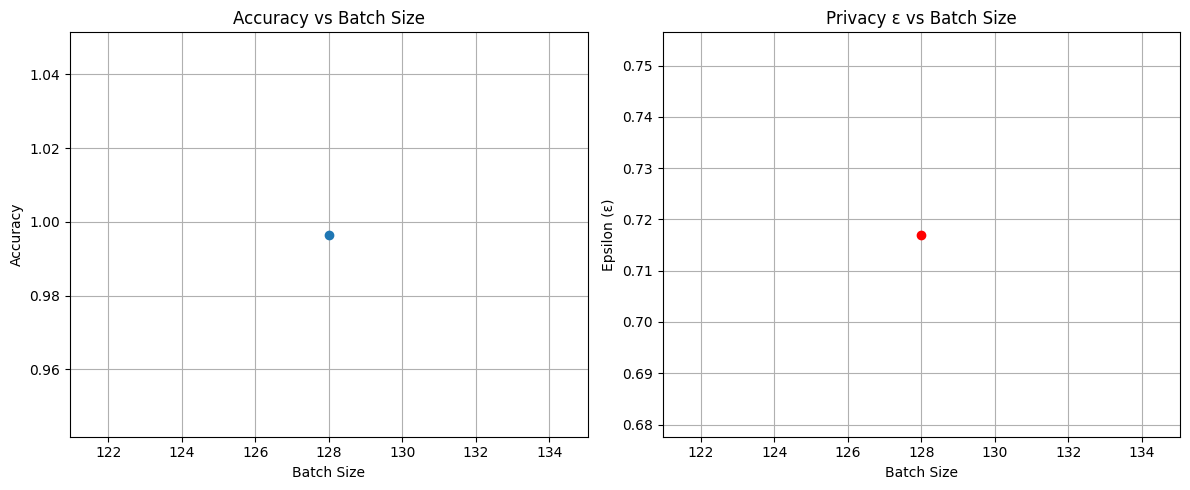

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 128
noise_multiplier = 1.0

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 256


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=256 → Accuracy=0.9965, ε=0.84


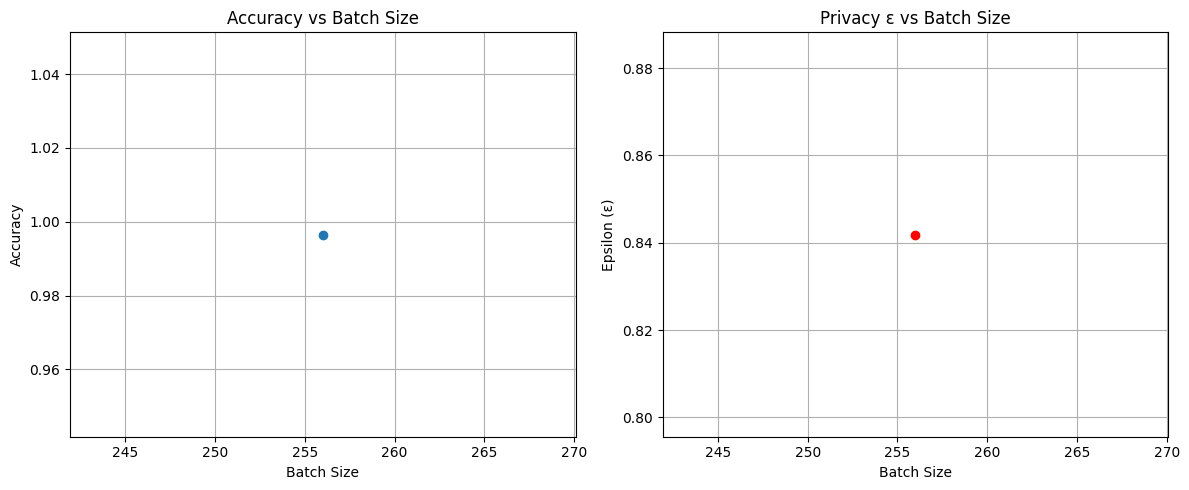

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 256
noise_multiplier = 1.0

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()


✅ Loaded data with shape: (181284, 46)
✅ Numeric columns: 37
✅ Categorical columns: 6
✅ Features preprocessed: (181284, 100053), type: <class 'scipy.sparse._csr.csr_matrix'>
✅ Data split:  (145027, 100053) (36257, 100053)
🚀 Training with batch size: 512


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

✅ Done: batch_size=512 → Accuracy=0.9966, ε=1.09


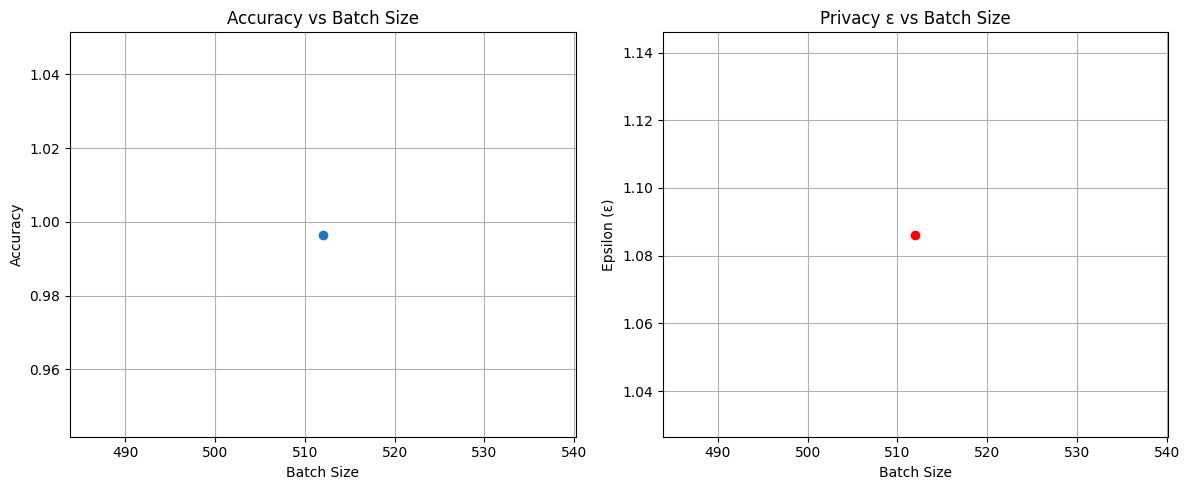

In [ ]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow_privacy.privacy.optimizers.dp_optimizer_keras import DPKerasAdamOptimizer
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy
from tensorflow.keras.losses import BinaryCrossentropy

# Install tqdm if not installed
!pip install -q tqdm
from tqdm.keras import TqdmCallback

# 🧩 Load dataset
data_path = '/content/drive/MyDrive/datasets/100000-Patients/merged_with_labs_pivoted.csv'
df = pd.read_csv(data_path)
print("✅ Loaded data with shape:", df.shape)

# 📉 Drop leakage columns
df = df.drop(columns=['next_admission_date', 'days_to_readmission'])

# 🎯 Encode target
label_encoder = LabelEncoder()
df['readmission'] = label_encoder.fit_transform(df['readmission'])

# ➗ Separate features and target
X = df.drop(columns=['readmission'])
y = df['readmission']

# 🔍 Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"✅ Numeric columns: {len(numeric_cols)}")
print(f"✅ Categorical columns: {len(categorical_cols)}")

# 🔧 Build preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    sparse_threshold=0.1
)

# 🔥 Preprocess features (keep sparse)
X_processed = preprocessor.fit_transform(X)
print(f"✅ Features preprocessed: {X_processed.shape}, type: {type(X_processed)}")

# ✂️ Train-test split
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print("✅ Data split: ", X_train_sparse.shape, X_test_sparse.shape)

# 🔄 Convert to TensorFlow SparseTensor
def scipy_to_tf_sparse(scipy_mat):
    coo = scipy_mat.tocoo()
    indices = np.vstack((coo.row, coo.col)).T
    return tf.sparse.SparseTensor(indices, coo.data.astype(np.float32), coo.shape)

X_train_tf = scipy_to_tf_sparse(X_train_sparse)
X_test_tf = scipy_to_tf_sparse(X_test_sparse)

# 🧱 Build the model
def create_sparse_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,), sparse=True),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# 📦 Create TensorFlow Datasets
batch_size = 512
noise_multiplier = 1.0

# Store results
results = []
print(f"🚀 Training with batch size: {batch_size}")

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tf, y_train))
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tf, y_test))
test_dataset = test_dataset.batch(batch_size, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

# Create model
model = create_sparse_model(X_train_sparse.shape[1])

# DP Optimizer
optimizer = DPKerasAdamOptimizer(
  l2_norm_clip=1.0,
  noise_multiplier=noise_multiplier,
  num_microbatches=batch_size,
  learning_rate=0.001
)

model.compile(
  optimizer=optimizer,
  loss=BinaryCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
  metrics=['accuracy']
    )

# Train model
history = model.fit(
  train_dataset,
  epochs=5,
  validation_data=test_dataset,
  verbose=0,
  callbacks=[TqdmCallback(verbose=1)]
)

# Evaluate
loss, accuracy = model.evaluate(test_dataset, verbose=0)

# Compute privacy budget
dataset_size = X_train_sparse.shape[0]
epsilon, _ = compute_dp_sgd_privacy(   # 🛠 only 2 outputs
  n=dataset_size,
  batch_size=batch_size,
  noise_multiplier=noise_multiplier,
  epochs=5,
  delta=1e-5
)

print(f"✅ Done: batch_size={batch_size} → Accuracy={accuracy:.4f}, ε={epsilon:.2f}")

results.append((batch_size, accuracy, epsilon))

# 📈 Plot Results
batch_sizes = [r[0] for r in results]
accuracies = [r[1] for r in results]
epsilons = [r[2] for r in results]

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Epsilon
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, epsilons, marker='o', color='red')
plt.title('Privacy ε vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Epsilon (ε)')
plt.grid(True)

plt.tight_layout()
plt.show()
